# CFL Package Quick Start

A handy set of commands that can be copy and pasted to run CFL quickly. 

We recommend running `cfl` from within either a python script (i.e. a `.py`
file) or a Jupyter Notebook. A python script can be easier to run quickly and
better enforces reproducibility, but a Jupyter Notebook is more interactive.

### 1. Import CFL

In [1]:
from cfl.experiment import Experiment

### 2. Load your data as a numpy array 

In [2]:
# generate random data (replace this with your actual data)
n_samples = 500 

import numpy as np
X = np.random.random((n_samples, 20)) # X data has 20 features
Y = np.random.random((n_samples, 3))  # Y data has only 3 features 

# print the data shape 
# both data sets should be in the shape (n_samples, n_features)
print(X.shape)
print(Y.shape)

(500, 20)
(500, 3)


### 3. Create parameter dictionaries 

In [3]:
# Create 3 dictionaries: one for data info, one with CDE parameters, and one with cluster parameters

# the parameters should be passed in dictionary form 
data_info = {'X_dims' : X.shape, 
             'Y_dims' : Y.shape, 
             'Y_type' : 'continuous' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not 
# allowed for data_info)
CDE_params = {  'model'        : 'CondExpMod',
                'model_params' : {
                    # model architecture
                    'dense_units' : [50, data_info['Y_dims'][1]],
                    'activations' : ['relu', 'linear'],
                    'dropouts'    : [0, 0],
                    # training parameters
                    'batch_size'  : 32,
                    'n_epochs'    : 30,
                    'optimizer'   : 'adam',
                    'opt_config'  : {'lr' : 1e-4},
                    'loss'        : 'mean_squared_error',
                    'best'        : True, 
                    # verbosity
                    'verbose'     : 1,
                    'show_plot'   : True,
                }
}

# cluster_params consists of specifying two clustering objects
# CFL automatically recognizes the names of all sklearn.cluster models as keywords
cause_cluster_params =  {'model' : 'KMeans', 
                         'model_params' : {'n_clusters' : 4},
                         'verbose' : 0
}
effect_cluster_params = {'model' : 'KMeans', 
                         'model_params' : {'n_clusters' : 2},
                         'verbose' : 0
}

### 4. Set up the CFL pipeline 

In [4]:
# block_names indicates which CDE and clustering models to use 
block_names = ['CondDensityEstimator', 'CauseClusterer', 'EffectClusterer']

# block_params is aligned to block_names
block_params = [CDE_params, cause_cluster_params, effect_cluster_params] 

results_path = 'sample_run' # directory to save results to 

# Create a new CFL experiment with specified parameters
my_exp = Experiment(X_train=X, 
                    Y_train=Y, 
                    data_info=data_info, 
                    block_names=block_names, 
                    block_params=block_params, 
                    results_path=results_path)

save_path 'sample_run' doesn't exist, creating now.
All results from this run will be saved to sample_run/experiment0000
Block: verbose not specified in input, defaulting to 1
CondExpBase: activity_regularizers not specified in input, defaulting to None
CondExpBase: kernel_regularizers not specified in input, defaulting to None
CondExpBase: bias_regularizers not specified in input, defaulting to None
CondExpBase: kernel_initializers not specified in input, defaulting to None
CondExpBase: bias_initializers not specified in input, defaulting to None
CondExpBase: weights_path not specified in input, defaulting to None
CondExpBase: tb_path not specified in input, defaulting to None
CondExpBase: optuna_callback not specified in input, defaulting to None
CondExpBase: optuna_trial not specified in input, defaulting to None
CondExpBase: early_stopping not specified in input, defaulting to False
CondExpBase: checkpoint_name not specified in input, defaulting to tmp_checkpoints


### 5. Train the CFL model on the data 

#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
No GPU device detected.
Train on 375 samples, validate on 125 samples
Epoch 1/30
375/375 [==============================] - 4s 11ms/sample - loss: 0.7946 - val_loss: 0.7318
Epoch 2/30
375/375 [==============================] - 0s 766us/sample - loss: 0.7251 - val_loss: 0.6690
Epoch 3/30
375/375 [==============================] - 0s 1ms/sample - loss: 0.6614 - val_loss: 0.6112
Epoch 4/30
375/375 [==============================] - 0s 1ms/sample - loss: 0.6032 - val_loss: 0.5587
Epoch 5/30
375/375 [==============================] - 0s 511us/sample - loss: 0.5502 - val_loss: 0.5111
Epoch 6/30
375/375 [==============================] - 1s 2ms/sample - loss: 0.5022 - val_loss: 0.4678
Epoch 7/30
375/375 [==============================] - 1s 1ms/sample - loss: 0.4581 - val_loss: 0.4289
Epoch 8/30
375/375 [==============================] - 0s 1ms/sample - loss: 0.4192 - val_lo

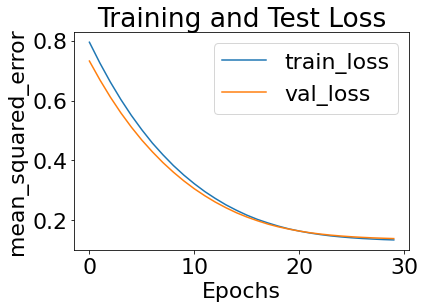

Loading parameters from  tmp_checkpoints23032022103422/best_weights
Saving parameters to  sample_run/experiment0000/trained_blocks/CondDensityEstimator
CondDensityEstimator training complete.
Beginning CauseClusterer training...


100%|██████████| 500/500 [00:00<00:00, 7144.49it/s]

CauseClusterer training complete.
Beginning EffectClusterer training...


EffectClusterer training complete.
Experiment training complete.


In [5]:
results = my_exp.train()

### 6. Visualizing Results 

Refer to the [Macrostate Visualization](https://cfl.readthedocs.io/en/latest/examples/basic_visualizations.html)
notebook for a more detailed example of how to visualize domain-generic CFL results.

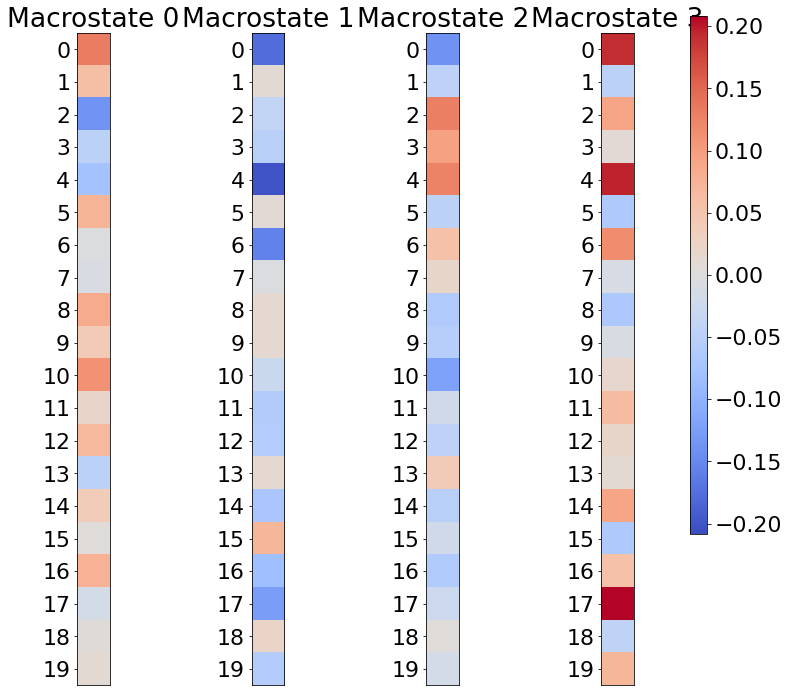

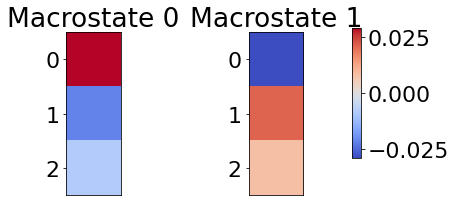

In [8]:
# visualize cause side macrostates
from cfl.visualization.basic_visualizations import visualize_macrostates

# visualize cause macrostates
visualize_macrostates(  data=X,
                        feature_names=None, 
                        cause_or_effect='cause', 
                        exp_path=my_exp.get_save_path(),
                        data_series='dataset_train',
                        subtract_global_mean=True)

# visualize effect macrostates
visualize_macrostates(  data=Y,
                        feature_names=None, 
                        cause_or_effect='effect', 
                        exp_path=my_exp.get_save_path(),
                        data_series='dataset_train',
                        subtract_global_mean=True)                        

### 7. Tuning CFL

Once you've set up a CFL pipeline, the hyperparameters needs to be tuned as is
the case with any other machine learning model. 

To tune the `CondDensityEstimator`, you can tune the hyperparamters specified
in `CDE_params` by following the Optuna tutorial or using your technique of 
choice. You can also consider different methods of conditional density 
estimation altogether (available models can be found in 
`cfl.cond_density_estimation`, and instructions for adding your own models
can be found in the Adding Blocks tutorial). 

To tune the `CauseClusterer` and/or `EffectCLusterer`, hyperparameters can be
tuned using CFL's built-in method described in the clusterer tuning tutorial,
or with your technique of choice. You can also consider different clustering
algorithms altogether, (all Sklearn clustering models are visible to CFL, and
instructions for adding your own models can be found in the Adding Blocks 
tutorial).